In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-86.81628428269782 -79.18297342481698
22.16062122037883 -46.81542088562742
69.5225241930905 105.44782785557499
16.960713236203517 111.91160150307843
-25.33654501283948 -134.38056986189613
-69.34931758204101 -84.353329772306
60.44963088023027 -94.67133931759817
-22.13596047669924 46.094353352794144
-87.1245663639065 -4.974207000155815
-63.04278613597451 143.11115595873804
76.84409602815398 156.17702492665273
8.1139240484531 -134.28113123699524
-1.0567569003434585 111.26552063428858
-37.15430680656719 34.32602908223731
44.48291028817263 57.015363874903215
67.8037957617704 -134.49817745283633
19.096622168096857 -139.74970848682526
28.367624931389244 78.91141458344089
-80.86766708288332 -8.143922870102216
-13.729806519018226 -143.98696972601655
18.5903417778743 -114.77167647338472
-32.08584492877509 -120.45055552340888
32.79224435493444 60.4636208872725
-32.214749992686905 -130.74919251009263
-35.33593281270987 -162.34195913548234
61.25748747397162 -147.18573688395094
38.65313881947273 118

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | wanning
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | ihosy
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | pangkalanbuun
Processing Record 14 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 1 | beyneu
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | bisauli
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | anar darreh
City not found. Skipping...
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | 

Processing Record 37 of Set 4 | tukrah
Processing Record 38 of Set 4 | sungairaya
Processing Record 39 of Set 4 | tautira
Processing Record 40 of Set 4 | nampa
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | poykovskiy
Processing Record 43 of Set 4 | panguna
Processing Record 44 of Set 4 | panuco
Processing Record 45 of Set 4 | glasgow
Processing Record 46 of Set 4 | clyde river
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | port shepstone
Processing Record 50 of Set 4 | labuhan
Processing Record 1 of Set 5 | yucca valley
Processing Record 2 of Set 5 | lawrenceburg
Processing Record 3 of Set 5 | araouane
Processing Record 4 of Set 5 | daru
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | lyubashivka
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | songjianghe
Processing Record 9 of Set 5 | la asuncion
Processing Recor

Processing Record 26 of Set 8 | oranjemund
Processing Record 27 of Set 8 | grimari
City not found. Skipping...
Processing Record 28 of Set 8 | udachnyy
Processing Record 29 of Set 8 | nioro
Processing Record 30 of Set 8 | bocas del toro
Processing Record 31 of Set 8 | komsomolskiy
Processing Record 32 of Set 8 | batemans bay
Processing Record 33 of Set 8 | mizpe ramon
City not found. Skipping...
Processing Record 34 of Set 8 | corbelia
Processing Record 35 of Set 8 | nogent-le-rotrou
Processing Record 36 of Set 8 | wladyslawowo
Processing Record 37 of Set 8 | havre-saint-pierre
Processing Record 38 of Set 8 | plettenberg bay
Processing Record 39 of Set 8 | merritt island
Processing Record 40 of Set 8 | phan thiet
Processing Record 41 of Set 8 | kirakira
Processing Record 42 of Set 8 | santo domingo
Processing Record 43 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 8 | baculin
Processing Record 45 of Set 8 | lianzhou
Processing Record 46 of Set 8 | macusani
Processing

Processing Record 12 of Set 12 | juchipila
Processing Record 13 of Set 12 | new philadelphia
Processing Record 14 of Set 12 | campoverde
Processing Record 15 of Set 12 | minab
Processing Record 16 of Set 12 | brae
Processing Record 17 of Set 12 | klaksvik
Processing Record 18 of Set 12 | voh
Processing Record 19 of Set 12 | kieta
Processing Record 20 of Set 12 | pandan
Processing Record 21 of Set 12 | tay ninh
Processing Record 22 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 23 of Set 12 | kuching
Processing Record 24 of Set 12 | huanan
Processing Record 25 of Set 12 | gravelbourg
Processing Record 26 of Set 12 | karwar
Processing Record 27 of Set 12 | kapit
Processing Record 28 of Set 12 | san quintin
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | igarape-acu
City not found. Skipping...
Processing Record 31 of Set 12 | neringa
Processing Record 32 of Set 12 | bure
Processing Record 33 of Set 12 | morehead
Processing Record 34 of Set 12 | 

In [17]:
len(city_data)

575

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,75,0,5.75,AR,2022-10-03 01:11:29
1,Bathsheba,13.2167,-59.5167,79.41,94,40,8.05,BB,2022-10-03 01:14:04
2,Khatanga,71.9667,102.5000,23.77,96,99,11.32,RU,2022-10-03 01:14:04
3,Wanning,18.8003,110.3967,82.92,78,20,6.04,CN,2022-10-03 01:14:04
4,Rikitea,-23.1203,-134.9692,74.68,64,95,5.03,PF,2022-10-03 01:14:05
5,Punta Arenas,-53.1500,-70.9167,42.91,70,0,10.36,CL,2022-10-03 01:14:05
6,Thompson,55.7435,-97.8558,62.76,51,40,10.36,CA,2022-10-03 01:14:06
7,Ihosy,-22.4000,46.1167,58.10,96,16,3.31,MG,2022-10-03 01:14:06
8,Hermanus,-34.4187,19.2345,58.80,81,88,12.48,ZA,2022-10-03 01:14:06
9,Hobart,-42.8794,147.3294,62.06,66,75,5.75,AU,2022-10-03 01:12:59


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new_df = city_data_df[new_column_order]
city_data_new_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-10-03 01:11:29,-54.8000,-68.3000,42.46,75,0,5.75
1,Bathsheba,BB,2022-10-03 01:14:04,13.2167,-59.5167,79.41,94,40,8.05
2,Khatanga,RU,2022-10-03 01:14:04,71.9667,102.5000,23.77,96,99,11.32
3,Wanning,CN,2022-10-03 01:14:04,18.8003,110.3967,82.92,78,20,6.04
4,Rikitea,PF,2022-10-03 01:14:05,-23.1203,-134.9692,74.68,64,95,5.03
5,Punta Arenas,CL,2022-10-03 01:14:05,-53.1500,-70.9167,42.91,70,0,10.36
6,Thompson,CA,2022-10-03 01:14:06,55.7435,-97.8558,62.76,51,40,10.36
7,Ihosy,MG,2022-10-03 01:14:06,-22.4000,46.1167,58.10,96,16,3.31
8,Hermanus,ZA,2022-10-03 01:14:06,-34.4187,19.2345,58.80,81,88,12.48
9,Hobart,AU,2022-10-03 01:12:59,-42.8794,147.3294,62.06,66,75,5.75


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

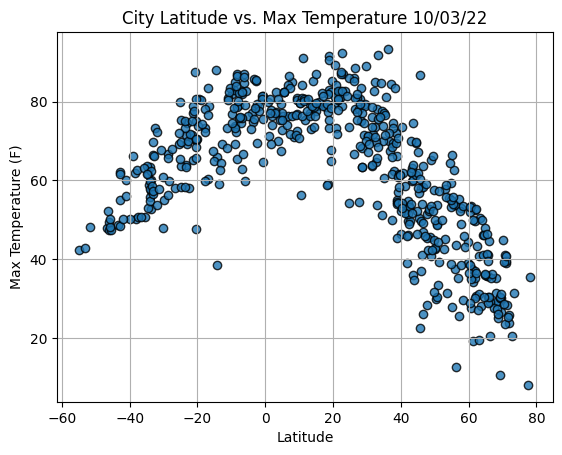

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

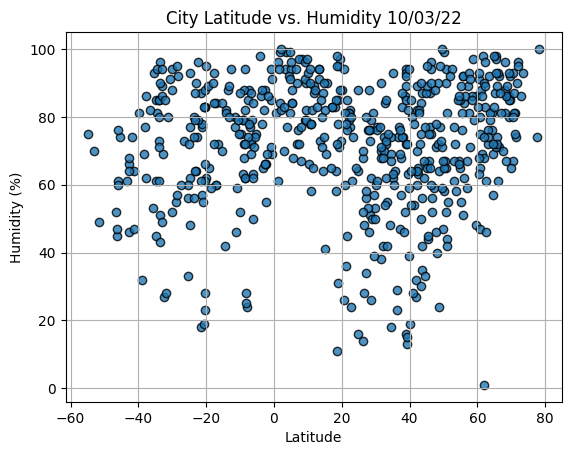

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

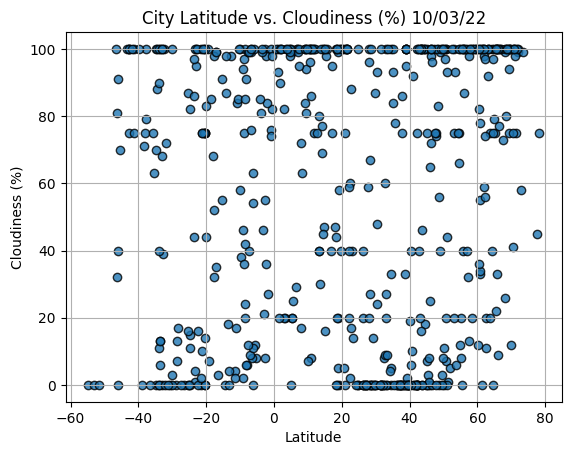

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

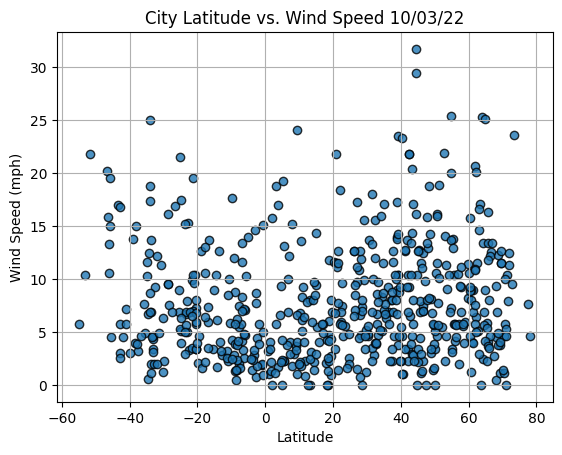

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()